In [1]:
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib
savedir = pathlib.Path('../figures')

In [2]:
a = np.array(([0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          [0, 1., 1., 1., 1., 1., 1., 1., 1, 0],
          [0, 1., 1., 1., 1., 1., 1., 1., 1, 0],
          [0, 1., 1., 1., 1., 1., 1., 1., 1, 0],
          [0, 1., 1., 1., 1., 1., 1., 1., 1, 0],
          [0, 0,0, 1., 1., 1., 1., 0,0, 0],
          [0, 0,0, 1., 1., 1., 1., 0,0, 0],
          [0, 0,0, 1., 1., 1., 1., 0,0, 0],
          [0, 0,0, 1., 1., 1., 1., 0,0, 0],
          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],))
a = np.transpose(a)

In [3]:
distances = ndimage.distance_transform_edt(a)
norm_distances = distances / np.max(distances)
eroded_norms = np.where(norm_distances > 0.5, norm_distances, 0)
eroded_a = np.where(norm_distances > 0.5, a, 0)

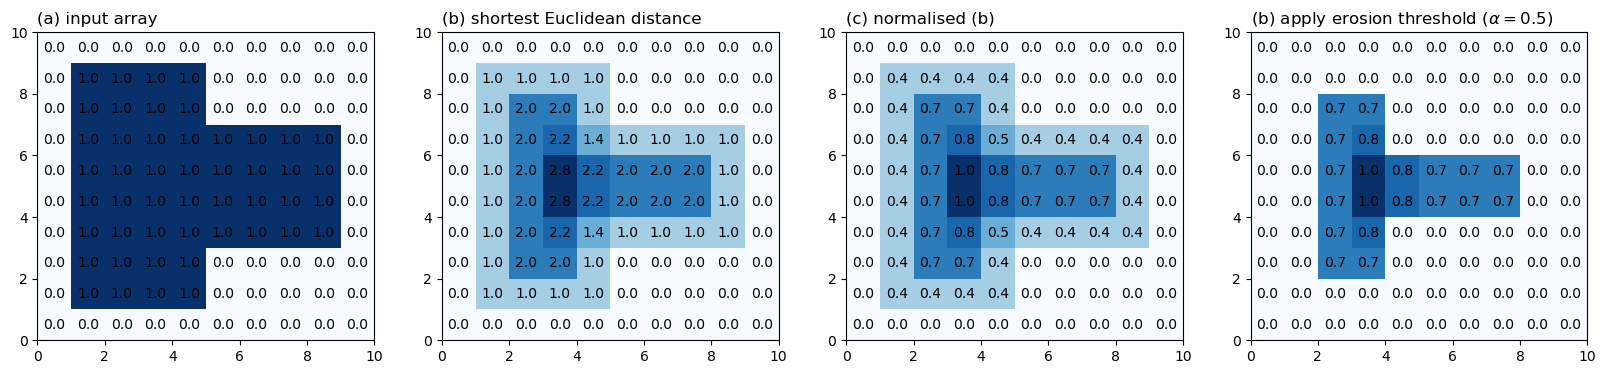

In [4]:
fig, axs = plt.subplots(1,4, figsize=(20,4))

cmap = 'Blues'

pc = {}
pc[0] = axs[0].pcolormesh(a, cmap=cmap)
pc[1] = axs[1].pcolormesh(distances, cmap=cmap)
pc[2] = axs[2].pcolormesh(norm_distances, cmap=cmap)
pc[3] = axs[3].pcolormesh(eroded_norms, cmap=cmap)

titles = ('(a) input array', '(b) shortest Euclidean distance', '(c) normalised (b)', r'(b) apply erosion threshold ($\alpha=0.5$)')
for i,ax in enumerate(axs):
    # plt.colorbar(pc[i])
    ax.set_title(titles[i], loc='left')

# add text
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        axs[0].text(j+.5, i+.5, round(a[i, j], 1), ha='center', va='center')
        axs[1].text(j+.5, i+.5, round(distances[i, j], 1), ha='center', va='center')
        axs[2].text(j+.5, i+.5, round(norm_distances[i, j], 1), ha='center', va='center')
        axs[3].text(j+.5, i+.5, round(eroded_norms[i, j], 1), ha='center', va='center')

fig.savefig(savedir/'figure_05.pdf', dpi=300, bbox_inches='tight')